## CA Strategic Thinking
### Student Name: 
### Emily Cristina Herbas Luizaga (2023100)
### Mijail Fausto Blanco Vargas (2023012)
### Git Hub Link: https://github.com/mijailbv/Strategic-Thinking-Collaborative-CA

# How to Minimise Churn While Increasing Revenue on your Customer Base

## 1. Introduction 


Churn is a common problem in the telecommunications business and refers to the percentage of customers who cancel or do not renew their contract with the company in a given period and it is a very important indicator since it is much more expensive to attract new customers than to retain existing ones, so the analysis of company data can help predict and prevent churn.

To understand why a customer churn from a company is very important since we always need to improve inside the company, offer deals, see what is the reason they are leaving our company; considering that each client brings profit to a company if they use our services and if we give a good service, we keep clients happy with us.

The dataset to be analyzed contains information about the services that our customers get in our company like phone service, internet service, online security, among other variables which will help us determine if a customer is going to churn or not.

## 2.	Motivation
The principal motivation for this analysis is to apply what we have been learning in Strategic Thinking into the analysis of Telecom Churn, 
Making an analysis and prediction of future churn cases would greatly assist this company in making short-term and long-term decision to prevent the growth of churn cases.

## 3.	Business Understanding
To predict Chun cases, we are going to implement different Machine Learning Models which were applied last semester, but also, we are going to improve the models analyzing the recall and applying hyperparameters to have certain results in which we can trust to make good predictions.


## 4. Data Understanding

### 4.1 Data Dictionary

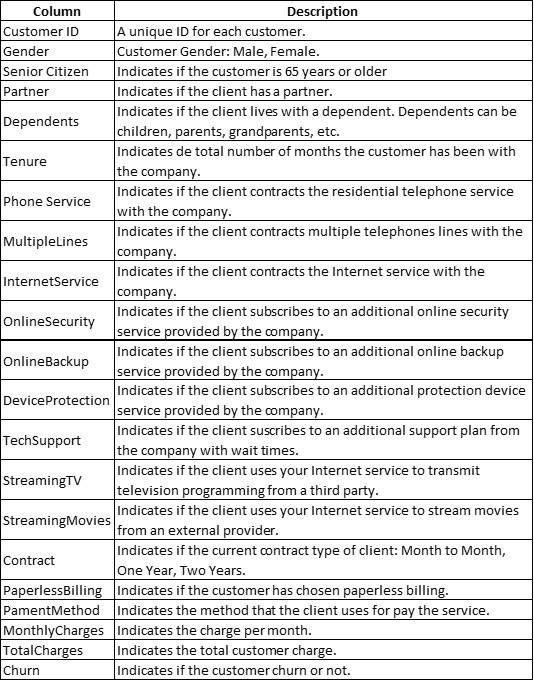

In [1]:
#Loading image of Data Dictionary
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

### 2.2 Data Understanding and Exploratory Data Analysis (EDA)

In [2]:
# Importing libraries for the analysis
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import norm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset.
df_churn = pd.read_csv('Telco_Churn.csv')

In [4]:
#Showing the first 5 rows of the dataset
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Looking at the first 5 rows and columns of the dataset, we can see a mixture of categorical, and numerical variables to be analyzed.

In [5]:
# Exploring the shape of the dataset
df_churn.shape
print('The dataset original shape is: ', df_churn.shape) 

The dataset original shape is:  (7043, 21)


In [6]:
#Statistics of numerical variables
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After analysing the descriptive statistics of the numerical values, we appreciate the number of values we have in each row, mean, standard deviation, minimum and maximum values,and the quartiles divided in 25%, 50%, and 75%.


- In each column we have 7043 rows.

- The mean of Senior Citizen is 0.16 which column is binary telling us that tends to 0 (which means No) giving us information that the majority of the people are not Senior Citizens, Tenure's mean is 32.37, but we have to note that tenure is measured monthly, and the mean of monthly charges is around 64.76.

- We can appreciate the different standard deviation values which is a measure of dispersion for explaining variability in the dataset.

- Besides, we have the min, max and quatile values (25th, 50th and 75th percentiles of the data), denoting that the 50th percentile is the median of the data set.

In [7]:
#Statistics of categorical variables
df_churn.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In the description of the categorical variables, we can appreciate the number of rows in each variable (count), how many unique values we have in each variable, the top or mode of each and the frequency in each one.- Besides, we have the min, max and quartile values (25th, 50th and 75th percent of the data), denoting that the 50th percentile is the median of the data set.

In [8]:
#Information of the variables
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that some variables are shown as object. However, according to the data dictionary, they should represent a numeric value for example "TotalCharges" and "OnlineBackup", this will be analyzed in the Data Cleaning part.

Now, let's take look at the target variable.

In [9]:
# We replace the categorical data found within the "Churn" column, which are "No"and "Yes" with 0 and 1.
df_churn['Churn'].replace('No', 0, inplace = True)
df_churn['Churn'].replace('Yes', 1, inplace = True)

In [10]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 5. EDA Visualizations

###  5.1 Visualizatios in Categorical Data

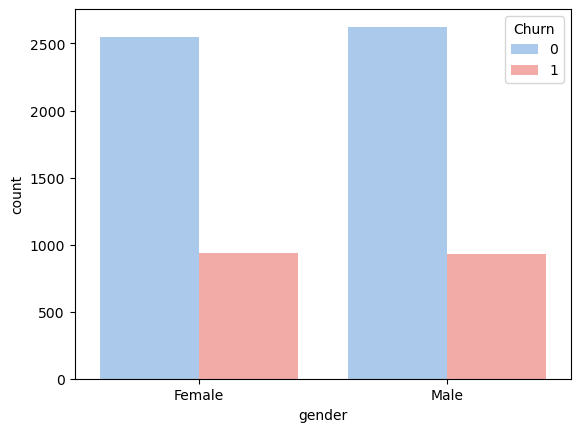

In [11]:
sns.countplot(data=df_churn, x='gender', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

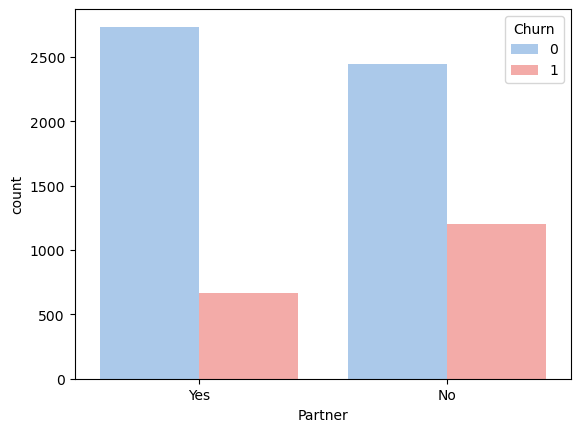

In [12]:
sns.countplot(data=df_churn, x='Partner', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

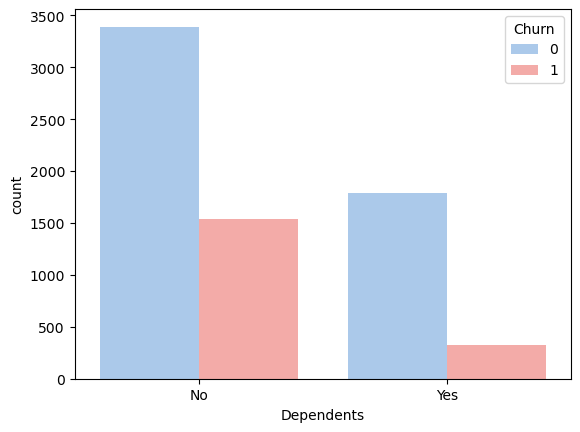

In [13]:
sns.countplot(data=df_churn, x='Dependents', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

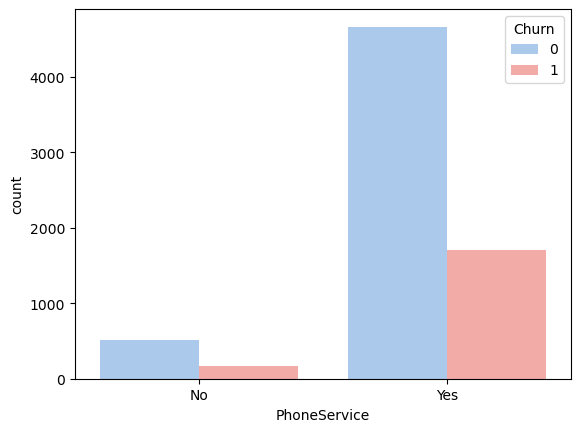

In [14]:
sns.countplot(data=df_churn, x='PhoneService', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

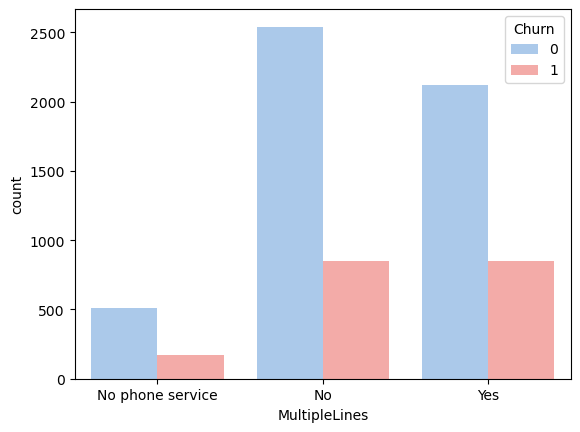

In [15]:
sns.countplot(data=df_churn, x='MultipleLines', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

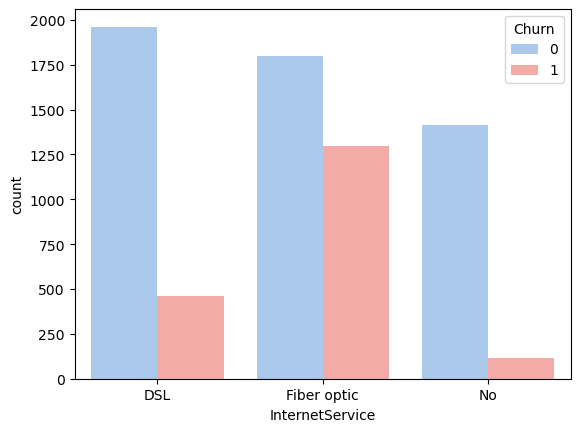

In [16]:
sns.countplot(data=df_churn, x='InternetService', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

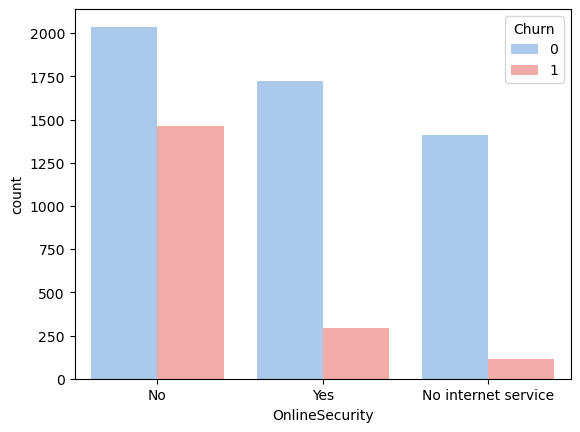

In [17]:
sns.countplot(data=df_churn, x='OnlineSecurity', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

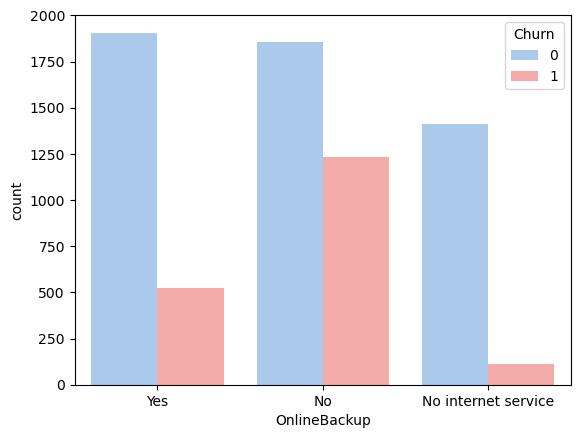

In [18]:
sns.countplot(data=df_churn, x='OnlineBackup', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()


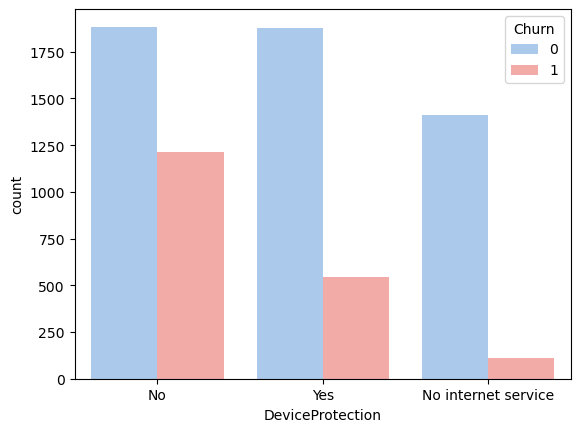

In [19]:
sns.countplot(data=df_churn, x='DeviceProtection', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

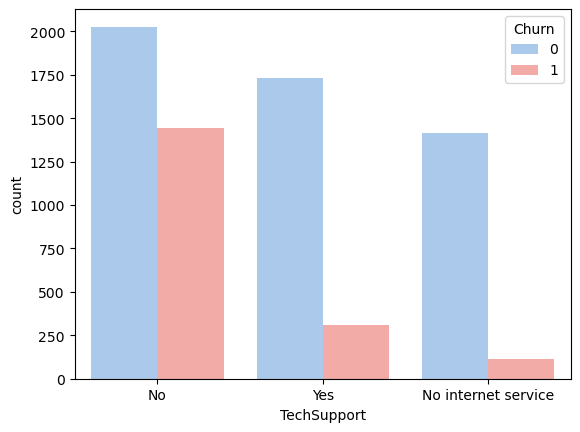

In [20]:
sns.countplot(data=df_churn, x='TechSupport', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

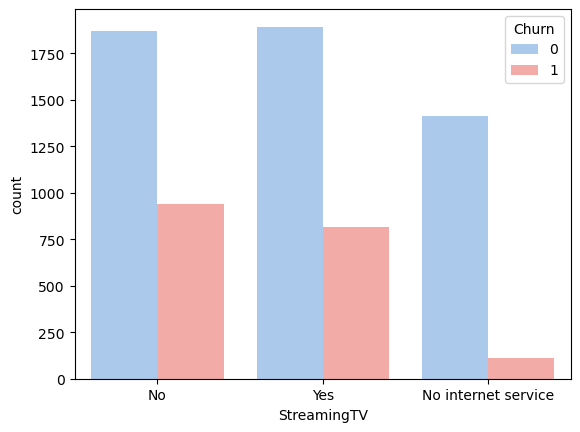

In [21]:
sns.countplot(data=df_churn, x='StreamingTV', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

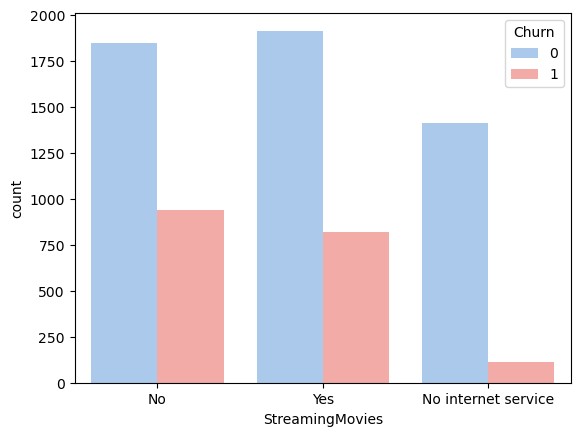

In [22]:
sns.countplot(data=df_churn, x='StreamingMovies', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

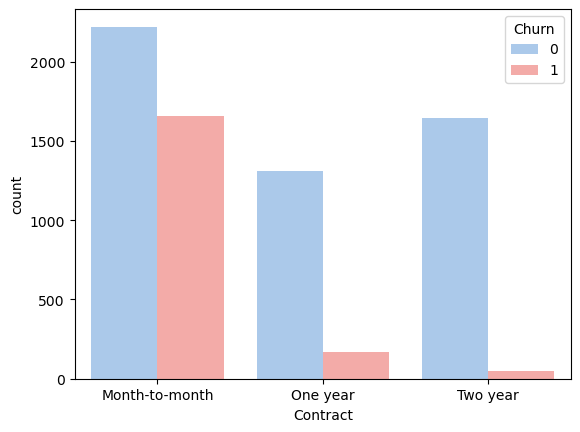

In [23]:
sns.countplot(data=df_churn, x='Contract', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

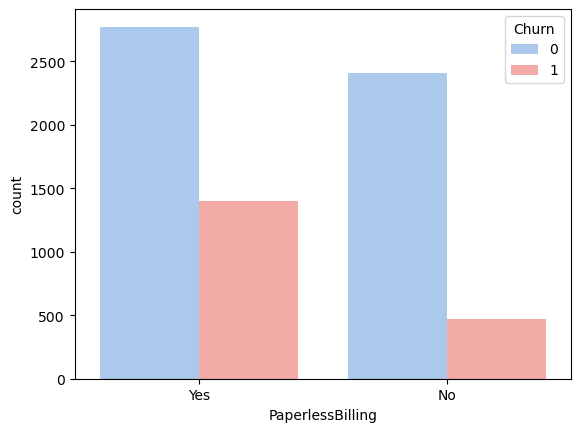

In [24]:
sns.countplot(data=df_churn, x='PaperlessBilling', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.show()

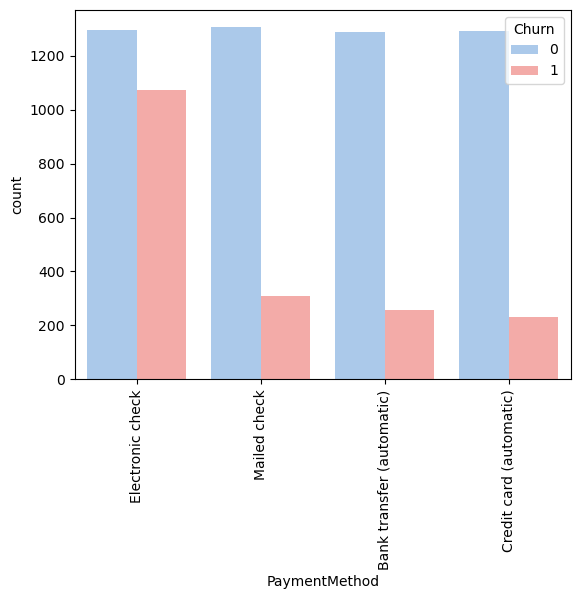

In [25]:
sns.countplot(data=df_churn, x='PaymentMethod', hue='Churn', palette={0: '#a1c9f4', 1: '#ff9f9b'})

# Show the plot
plt.xticks(rotation=90)
plt.show()

### 5.2 Visualiuzations in Continuouss variiables

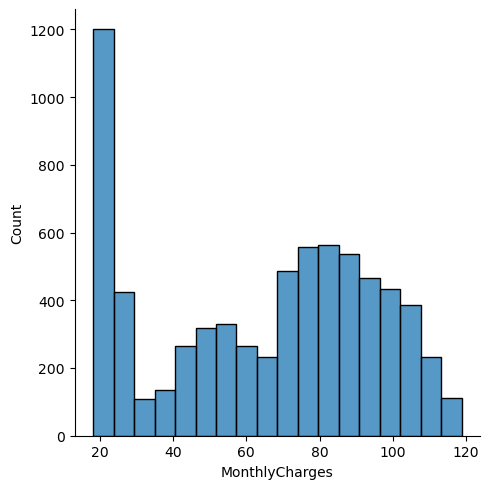

In [26]:
sns.displot(df_churn['MonthlyCharges'])

### 5.3 Visualizations in numerical discrete variables

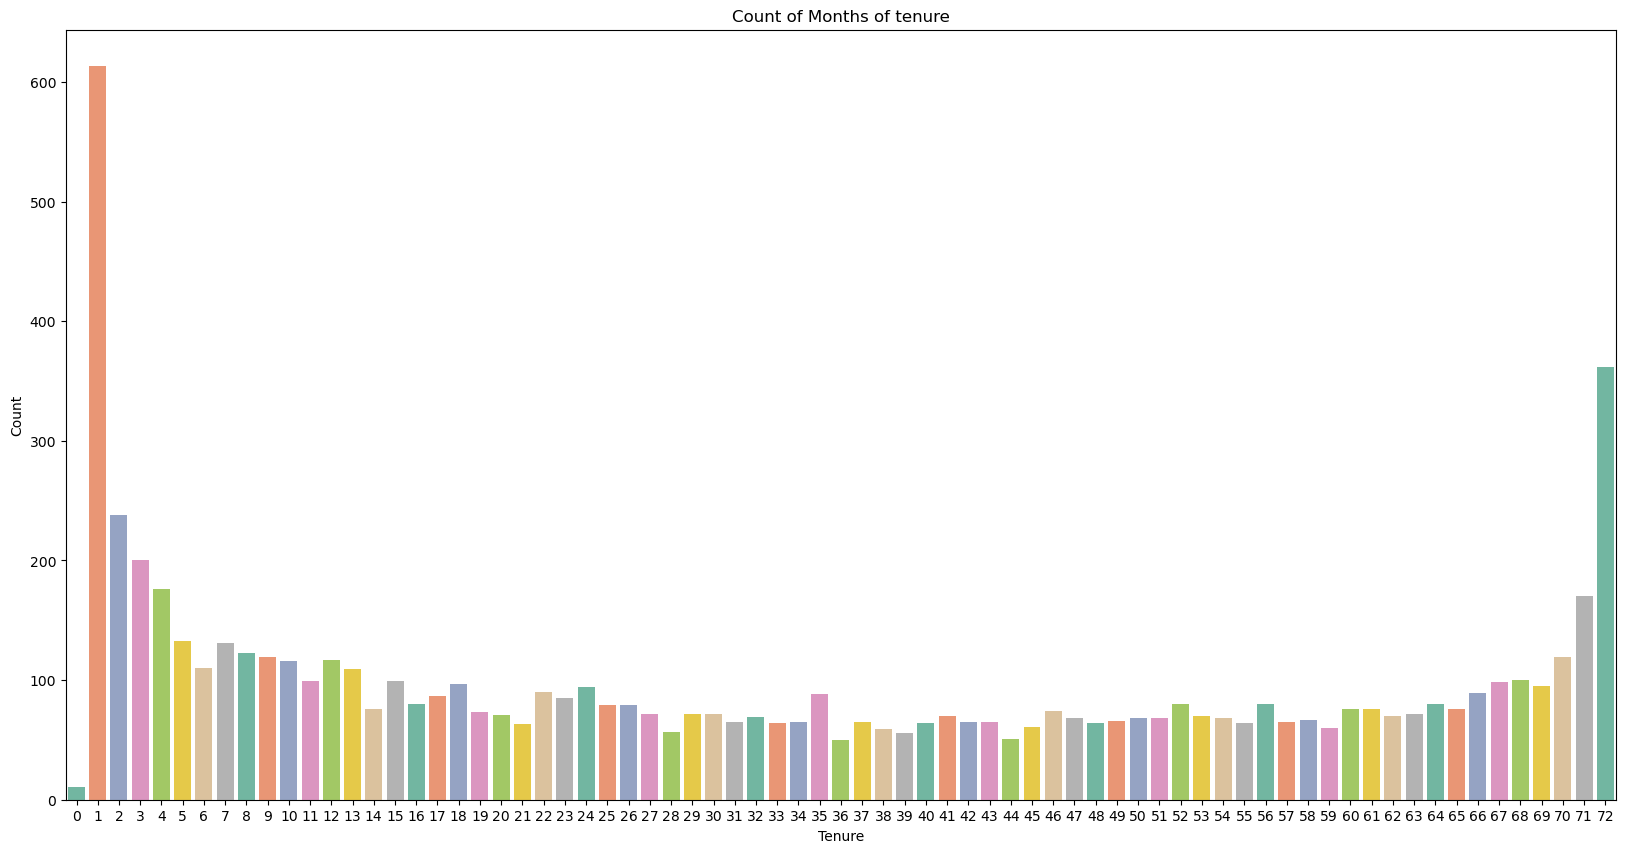

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(x='tenure', data=df_churn, palette='Set2')

plt.title('Count of Months of tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')

plt.show()

In this graphic we can see that many customers that stayed with us one month doesn’t get our products for the second month and that is very important to analyse for keeping the customers in the future and making them loyal. On the other hand, we can see the last bar in the bar pot that many customers stayed with us for a long time making them loyal inside our company.

## 6. Data Cleaning and Feature Engineering

### 6.1 Dropping duplicates

In [28]:
# Dropping duplicates
df_churn.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [29]:
# Shape of the data after dropping duplicates
df_churn.shape

(7043, 21)

There are no duplicates in our data and now we are going to standarize the "Nan" values and analyze their presence in each column.

### 6.2 Analysis of Null values

In [30]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--", " ", "-",""]
df_churn = df_churn.replace(missing_val, pd.NA)

In [31]:
#Number of null values in each column
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


We have Null Values in the column Total Charges, when we are analyzing the data visualization, we will decide what is the best approach to deal with the missing values, but first let'e analyze the column "OnlineBackup" as previous semester "OnlineBackup" that has a value different than "Yes" or "No" was replaced by zeros.

In [32]:
#Showing the data inside the column "OnlineBackup"
df_churn['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

In [33]:
# We replace the categorical data in the "OnlineBackup", "No" and "Yes" columns with 0 and 1
df_churn['OnlineBackup'].replace('No', 0, inplace = True)
df_churn['OnlineBackup'].replace('Yes', 1, inplace = True)
df_churn['OnlineBackup'].value_counts(dropna=False)

0                      3088
1                      2429
No internet service    1526
Name: OnlineBackup, dtype: int64

After looking cartefully inside the column "OnlineBackup" replacing "No internet Service" by zeros is not a good option since having internet without Online back up is not the same that not having internet. Probably this customers pay a little bit less for the service without online bakcup. So in this case, they will be replaces by 2.

In [34]:
#Replacing "No internet service" with teh number 2
df_churn['OnlineBackup'].replace('No internet service', 2, inplace = True)

For solving the issues with "TotalCharges" column, we will replace the "Nan" values with the multiplication between "tenure" and "MonthlyCharges" columns

In [35]:
#Replacing Nan values and showing the percentage of them.
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(df_churn['tenure'] * df_churn['MonthlyCharges'])
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [36]:
#Dropping the column "customer ID"
df_churn.drop(['customerID'], axis=1, inplace = True)

"customerID" variable was dropped from our dataset since it is like an index with combination of numbers and letters which make us consider not necessary for our analysis

In [37]:
#Showing the informations of the variables in the dataset
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


For a better understanding of the data, we will replace all the categorical values into numeric representations of them, and instead of using label encoder and autodefined encodders, we will repalace one by one for a knowing with certainty which numerical value represent that category.

#### 6.3 Integer Encoding

In [38]:
# We replaced the categorical data found within the "gender" column, which are "Male" and "Female" with 0 and 1.
df_churn['gender'].replace('Male', 0, inplace = True)
df_churn['gender'].replace('Female', 1, inplace = True)

# We replaced the categorical data found within the "Partner" column, which are "No" and "Yes" with 0 and 1.
df_churn['Partner'].replace('No', 0, inplace = True)
df_churn['Partner'].replace('Yes', 1, inplace = True)

# We replaced the categorical data found within the "Dependents" column, which are "No" and "Yes" with 0 and 1.
df_churn['Dependents'].replace('No', 0, inplace = True)
df_churn['Dependents'].replace('Yes', 1, inplace = True)

# We replaced the categorical data in the "PhoneService", "No" and "Yes" columns with 0 and 1
df_churn['PhoneService'].replace('No', 0, inplace = True)
df_churn['PhoneService'].replace('Yes', 1, inplace = True)

# We replace the categorical data in the "MultipleLines", "No", "Yes" and "No phone service" columns with 0, 1 and 2
df_churn['MultipleLines'].replace('No', 0, inplace = True)
df_churn['MultipleLines'].replace('Yes', 1, inplace = True)
df_churn['MultipleLines'].replace('No phone service', 2, inplace = True)

# We replaced the categorical data in the "InternetService", "No", "DSL" and "Fiber optic" columns with 0, 1 and 2
df_churn['InternetService'].replace('No', 0, inplace = True)
df_churn['InternetService'].replace('DSL', 1, inplace = True)
df_churn['InternetService'].replace('Fiber optic', 2, inplace = True)

# We replaced the categorical data in the "OnlineSecurity", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['OnlineSecurity'].replace('No', 0, inplace = True)
df_churn['OnlineSecurity'].replace('No internet service', 1, inplace = True)
df_churn['OnlineSecurity'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "DeviceProtection", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['DeviceProtection'].replace('No', 0, inplace = True)
df_churn['DeviceProtection'].replace('No internet service', 1, inplace = True)
df_churn['DeviceProtection'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "TechSupport", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['TechSupport'].replace('No', 0, inplace = True)
df_churn['TechSupport'].replace('No internet service', 1, inplace = True)
df_churn['TechSupport'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "StreamingTV", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['StreamingTV'].replace('No', 0, inplace = True)
df_churn['StreamingTV'].replace('No internet service', 1, inplace = True)
df_churn['StreamingTV'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "StreamingTV", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['StreamingMovies'].replace('No', 0, inplace = True)
df_churn['StreamingMovies'].replace('No internet service', 1, inplace = True)
df_churn['StreamingMovies'].replace('Yes', 2, inplace = True)

# We replaced the categorical data found within the "Contract" column, which are "Month-to-month","Two year" and "One year" with 0, 1 and 2.
df_churn['Contract'].replace('Month-to-month', 0, inplace = True)
df_churn['Contract'].replace('Two year', 1, inplace = True)
df_churn['Contract'].replace('One year', 2, inplace = True)

# We replaced the categorical data in the "PaperlessBilling", "No" and "Yes" columns with 0 and 1
df_churn['PaperlessBilling'].replace('No', 0, inplace = True)
df_churn['PaperlessBilling'].replace('Yes', 1, inplace = True)

# We replace the categorical data in the "PaymentMethod", "No" and "Yes" columns with 0 and 1
df_churn['PaymentMethod'].replace('Electronic check', 0, inplace = True)
df_churn['PaymentMethod'].replace('Mailed check', 1, inplace = True)
df_churn['PaymentMethod'].replace('Bank transfer (automatic)', 2, inplace = True)
df_churn['PaymentMethod'].replace('Credit card (automatic)', 3, inplace = True)

# We replaced the categorical data found within the "Churn" column, which are "No" and "Yes" with 0 and 1.
df_churn['Churn'].replace('No', 0, inplace = True)
df_churn['Churn'].replace('Yes', 1, inplace = True)

In [39]:
#Analyzing the dtypes of all the variables and null values
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## 7. Correlation Analysis

### 7.1 ,Correlation Matrix

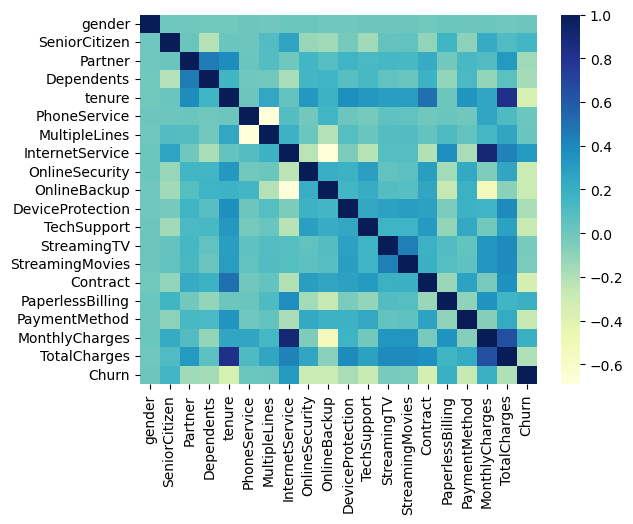

In [40]:
corr_matrix = df_churn.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [41]:
# Correlation of the variables with the column churn
correlation_churn = df_churn.corr()['Churn']
print(correlation_churn)

gender              0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.019423
InternetService     0.316846
OnlineSecurity     -0.289309
OnlineBackup       -0.291449
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.341504
PaperlessBilling    0.191825
PaymentMethod      -0.262818
MonthlyCharges      0.193356
TotalCharges       -0.198324
Churn               1.000000
Name: Churn, dtype: float64


According to the matrix of correlation and the results we have gotten with the target variable "Churn", we can see that our target variable is very correlated with the column "tenure", "InternetService", "OnlineBackup", among others, but we will apply different tests to see if all the variables are really necessary for our analysis.

In [42]:
#Analyzing unique values in each variable
df_churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

For the columns in which we have less than 30 unique values, we are going to apply Chi-squared test and for the ones that have more or same as 30 unique values, we are going to apply Anova test.

### 7.2 ANOVA Test for Correlation Analysis

For ANOVA test, we stated the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): There is evidence that the variable is correlated with the target variable "churn"

($H_A$): There is non-evidence that the variable is correlated with the target variable "churn"

The significance level stablished by default is 0.05

In [43]:
# Applying ANOVA test to analyse the correlation with the target variable
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [44]:
# Analysing variables with more than 30 unique values with ANOVA test
continuousVariables = ['tenure', 'MonthlyCharges', 'TotalCharges']
FunctionAnova(df_churn, 'Churn', continuousVariables )

##### ANOVA Results ##### 

tenure is correlated with Churn | P-Value: 7.999057960610892e-205
MonthlyCharges is correlated with Churn | P-Value: 2.7066456068950115e-60
TotalCharges is correlated with Churn | P-Value: 2.127211613245422e-63


['tenure', 'MonthlyCharges', 'TotalCharges']

As the p-values is more than 0.05 in all of them, we can conclude that there is evidence that the variables "tenure", "MonthlyCharges", and "TotalCharges" are correlated with the target variable

### 7.3 Chi-squared test for Correlation Analysis

For Chi-squared test, we stated the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): There is evidence that the variable is correlated with the target variable "churn"

($H_A$): There is non-evidence that the variable is correlated with the target variable "churn"

The significance level stablished by default is 0.05

In [45]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [46]:
categoricalVariables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calling the function
FunctionChisq(df_churn, 'Churn', categoricalVariables)

gender is NOT correlated with Churn | P-Value: 0.48657873605618596
SeniorCitizen is correlated with Churn | P-Value: 1.510066805092378e-36
Partner is correlated with Churn | P-Value: 2.1399113440759935e-36
Dependents is correlated with Churn | P-Value: 4.9249216612154196e-43
PhoneService is NOT correlated with Churn | P-Value: 0.3387825358066928
MultipleLines is correlated with Churn | P-Value: 0.0034643829548773
InternetService is correlated with Churn | P-Value: 9.571788222840544e-160
OnlineSecurity is correlated with Churn | P-Value: 2.6611496351768565e-185
OnlineBackup is correlated with Churn | P-Value: 2.0797592160865457e-131
DeviceProtection is correlated with Churn | P-Value: 5.505219496457244e-122
TechSupport is correlated with Churn | P-Value: 1.4430840279999813e-180
StreamingTV is correlated with Churn | P-Value: 5.528994485739024e-82
StreamingMovies is correlated with Churn | P-Value: 2.667756755723681e-82
Contract is correlated with Churn | P-Value: 5.863038300672725e-258


['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

After applying both tests we can see that the columns "gender", and "PhoneService" are not correlated and that is why we are going to drop them

In [47]:
df_churn = df_churn.drop(['gender', 'PhoneService'], axis= 1)

Before performing the modelling part, we are going to separate using the function dummies inside the columns "InternetService", "PaymentMethod" and "Contract"

## 8. PCA and Standard Scaler

In [48]:
# Dropping the column "churn"
df_churn_without_column_churn =  df_churn.drop(["Churn"], axis = 1)

In [49]:
#Aplying Standard Scaler in the dat
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_churn_without_column_churn = scaler.fit_transform(df_churn_without_column_churn)

In [50]:
# Applying PCA into the mode
from sklearn.decomposition import PCA
pca = PCA(0.995).fit(df_churn_without_column_churn)
num_components = pca.n_components_
print('Number of Components:', num_components)

Number of Components: 15


In [51]:
# Defining the new shape of hte data with PCA
pca = PCA(15)
projected = pca.fit_transform(df_churn_without_column_churn)
projected.shape

(7043, 15)

In [52]:
# adding  new columns to the data frame and also the target variable "churn"
df_projected = pd.DataFrame(projected)
new_col_names = [f"A{i+1}" for i in range(15)]
df_projected.columns = new_col_names
df_projected["Churn"] = df_churn['Churn']

## 9. Modeling

### 9.1 Applying Machine Learning models with 10% test and 90% training

In [53]:
# Defining the variabels and splitting the data
from sklearn.model_selection import train_test_split
X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(6338, 15) (705, 15) (6338,) (705,)


In [54]:
#Counting values in target variable
y_train.value_counts()

0    4663
1    1675
Name: Churn, dtype: int64

In [55]:
#Applying Machine Learning models with "Accuracy as score"
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [56]:
# Printing the results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.801201 (0.016005)
LDA: 0.799782 (0.013586)
KNN: 0.759543 (0.014260)
CART: 0.728777 (0.007751)
NB: 0.788102 (0.013657)
NN: 0.789525 (0.011596)
RF: 0.781951 (0.012205)


The best model is Logistic Regression. Let's explore the classification report

Accuracy Score:  0.8241134751773049

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       511
           1       0.72      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.79      0.75      0.77       705
weighted avg       0.82      0.82      0.82       705


Confusion Matrix: 
 [[465  46]
 [ 78 116]]


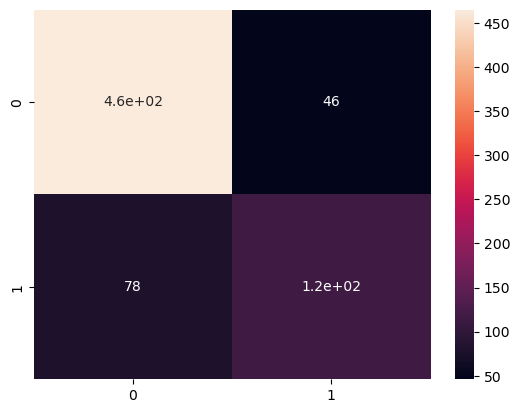

In [57]:
# Plotting the Accuracy, Classification Report, Confusion Matrix in Logistic Regression Model
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

Although we have a good accuracy specially using Logistic Regression, the model does't perform very good when we look at the precision and recall of 1 that is trying to predict the people that churned at the company. According to the correlation matrix the model has 81 false negatives churned values that were not well predicted.

### 9..1.1 Model Tuning

In this part instead of using accuracy as our score, we are going to use recall since we want to improve the models for predicting the people that are goning to churn in our company.

In [58]:
#Applying Machin Learning Models with "Recall" as score metric
scoring = 'recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [59]:
#Printing the results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.531041 (0.034790)
LDA: 0.557347 (0.036810)
KNN: 0.479521 (0.036411)
CART: 0.485396 (0.019279)
NB: 0.568372 (0.034388)
NN: 0.499563 (0.041865)
RF: 0.438863 (0.030081)


Now Gaussian NB is the best model that performs with our data according to the recall

In [60]:
# Analyzing NB model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [61]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8042553191489362
[[452  59]
 [ 79 115]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       511
           1       0.66      0.59      0.62       194

    accuracy                           0.80       705
   macro avg       0.76      0.74      0.75       705
weighted avg       0.80      0.80      0.80       705



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

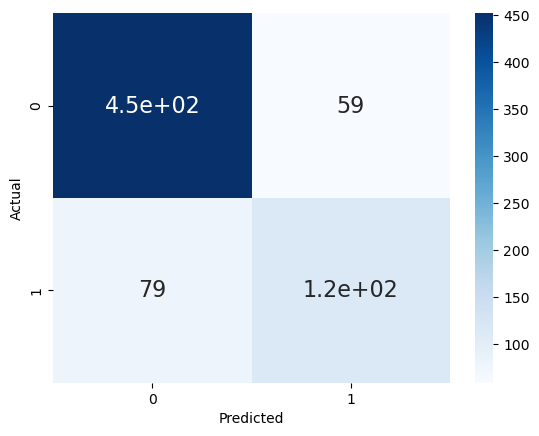

In [62]:
#Plotting the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

we can see now 30 cases of false negatives, but we are going to work in balancing the dataset for better results

### 9.1.2 Model Tuning for balancing the sample using Random Under Sampling with 10% test and 90% training

In [63]:
#Printing the values of the target variable
y_train.head()

1554    0
4817    0
5957    1
5123    1
3217    0
Name: Churn, dtype: int64

In [64]:
# Balancing the data
df = pd.concat([X_train, y_train], axis=1)
churned_df = df.loc[df['Churn'] == 1]
non_churned_df = df.loc[df['Churn'] == 0][:churned_df.shape[0]]
normal_distributed_df = pd.concat([churned_df, non_churned_df])
df_new_churn = normal_distributed_df.sample(frac=1, random_state=42)
y_train_new= df_new_churn["Churn"]
X_train_new = df_new_churn.loc[:, df_projected.columns != 'Churn']

In [65]:
#Unique values of the datafram
df_new_churn.Churn.unique()

array([0, 1], dtype=int64)

Distribution of the Classes in the subsample churn dataset
0    0.5
1    0.5
Name: Churn, dtype: float64


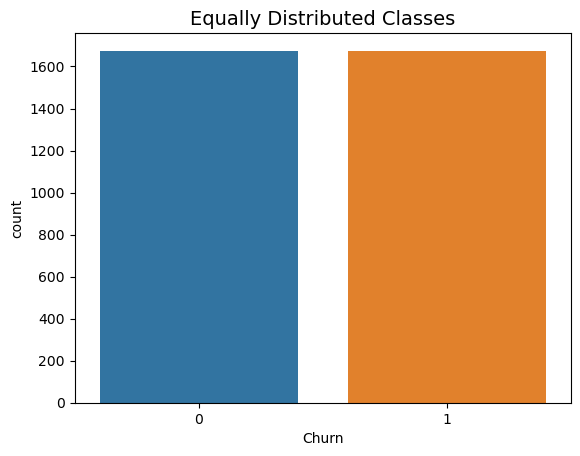

In [66]:
#Boxplot of the new distribution of the data
print('Distribution of the Classes in the subsample churn dataset')
print(df_new_churn['Churn'].value_counts() / len(df_new_churn))
sns.countplot(x='Churn', data=df_new_churn)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

We have balanced our data and now we can improve our metrics using accuracy as scoring

In [67]:
#Evaluating models with accuracy score metric
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [68]:
#Results of the evaluation of models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.756425 (0.019334)
LDA: 0.754038 (0.022222)
KNN: 0.719708 (0.017257)
CART: 0.673162 (0.028879)
NB: 0.747169 (0.020311)
NN: 0.741496 (0.015316)
RF: 0.725976 (0.018438)


### 9.1.3 Applying Hyperparameter tuning with Logistic Regression

In [69]:
# Finding the best hyperparameters of the model and implementing Grid Search
test_split_percentages = [0.10]

for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  
        'solver': ['liblinear'],  
        'penalty': ['l1', 'l2'],  
        'max_iter': [100, 200, 300]  
    }

    logistic_regression = LogisticRegression()
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_predict = best_model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(best_model)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 10% Test Split:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for 10% Test Split: 0.7522388059701492




In [70]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7522388059701492
[[120  39]
 [ 44 132]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       159
           1       0.77      0.75      0.76       176

    accuracy                           0.75       335
   macro avg       0.75      0.75      0.75       335
weighted avg       0.75      0.75      0.75       335



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

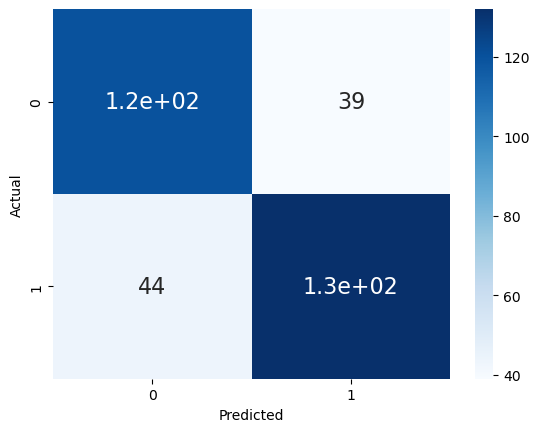

In [71]:
# Showing the correlation matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.1.4 Applying Hyperparameter tuning with Linear Discriminant Analysis (LDA)

In [72]:
# Showing results of LDA with hyperparameters
test_split_percentages = [0.10]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    lda = LinearDiscriminantAnalysis()
    parameter_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],  
        'shrinkage': [None, 'auto']          
    }
    
    grid = GridSearchCV(lda, parameter_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")


Best Model for 10% Test Split:
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
Accuracy for 10% Test Split: 0.7432835820895523




In [73]:
# Showing the classification matrix
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7522388059701492
[[120  39]
 [ 44 132]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       159
           1       0.77      0.75      0.76       176

    accuracy                           0.75       335
   macro avg       0.75      0.75      0.75       335
weighted avg       0.75      0.75      0.75       335



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

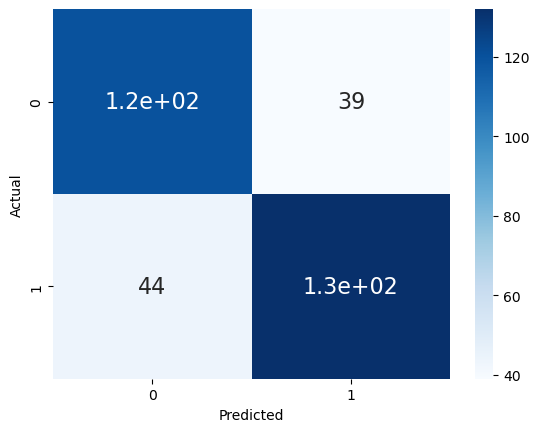

In [74]:
# Plotting confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.1.5 Applying Hyperparameter tuning with KNeighbors Classifier (KNN)

In [75]:
test_split_percentages = [0.10]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    knn = KNeighborsClassifier()
    parameter_grid = {
        'n_neighbors': [3, 5, 7], 
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 10% Test Split:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
Accuracy for 10% Test Split: 0.746268656716418




In [76]:
# Showing the classification matrix
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.746268656716418
[[115  44]
 [ 41 135]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       159
           1       0.75      0.77      0.76       176

    accuracy                           0.75       335
   macro avg       0.75      0.75      0.75       335
weighted avg       0.75      0.75      0.75       335



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

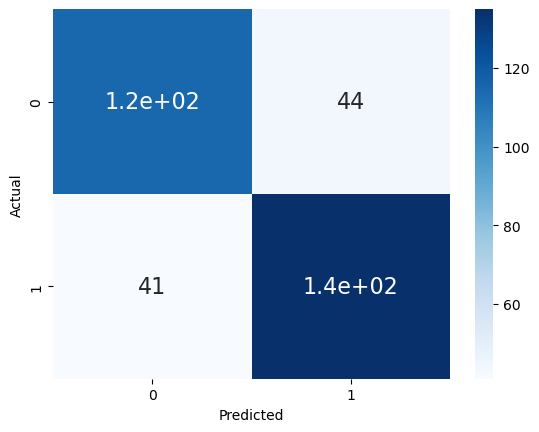

In [77]:
# Plotting the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.2 Applying the models with 20% test and 80% training

In [78]:
# Defining variables and splitting the data
from sklearn.model_selection import train_test_split
X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5634, 15) (1409, 15) (5634,) (1409,)


In [79]:
#Counting values of the target variable
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [80]:
#Applying models with accuracy as score metric
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [81]:
# Printing the results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.799079 (0.007779)
LDA: 0.796240 (0.010057)
KNN: 0.759852 (0.007074)
CART: 0.720628 (0.015099)
NB: 0.786298 (0.011535)
NN: 0.789138 (0.006498)
RF: 0.777247 (0.008778)


Accuracy Score:  0.8176011355571328

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix: 
 [[937  99]
 [158 215]]


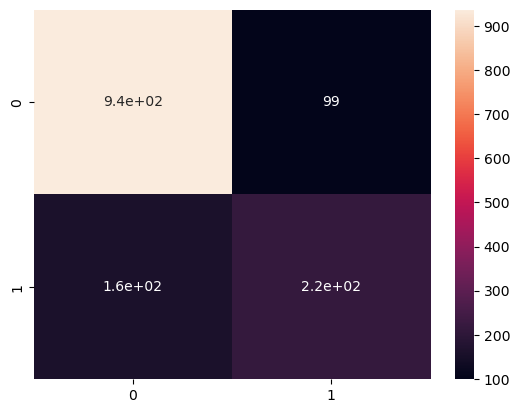

In [82]:
# Printing Clasification report with LR and confusion matrix
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)
print("Accuracy Score: ", accuracy_score(y_validation, y_pred))
print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)
print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

### 9.2.1 Model Tuning with 20% test and 80% training

In [83]:
#Evaluating the models with recall metric
scoring = 'recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [84]:
#Printing the results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.524182 (0.025965)
LDA: 0.551650 (0.027250)
KNN: 0.483889 (0.035161)
CART: 0.474856 (0.028677)
NB: 0.566606 (0.017757)
NN: 0.514272 (0.028798)
RF: 0.436128 (0.015859)


In [85]:
# Analyzing NB model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [86]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8005677785663591
[[899 137]
 [144 229]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1036
           1       0.63      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

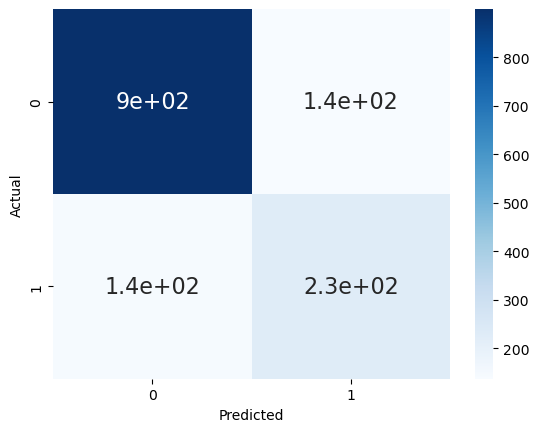

In [87]:
#Showing the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.2.2 Model Tuning for balancing the sample using Random Under Sampling with 20% test and 80% training

In [88]:
# Looking first 5 rows of the target variable
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64

Distribution of the Classes in the subsample churn dataset
1    0.5
0    0.5
Name: Churn, dtype: float64


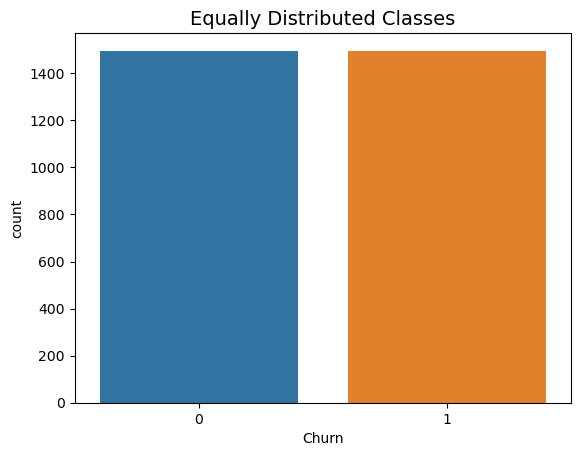

In [89]:
#Balancing the target variable
df = pd.concat([X_train, y_train], axis=1)
churned_df = df.loc[df['Churn'] == 1]
non_churned_df = df.loc[df['Churn'] == 0][:churned_df.shape[0]]
normal_distributed_df = pd.concat([churned_df, non_churned_df])
df_new_churn = normal_distributed_df.sample(frac=1, random_state=42)
y_train_new= df_new_churn["Churn"]
X_train_new = df_new_churn.loc[:, df_projected.columns != 'Churn']
print('Distribution of the Classes in the subsample churn dataset')
print(df_new_churn['Churn'].value_counts() / len(df_new_churn))
sns.countplot(x='Churn', data=df_new_churn)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

In [90]:
# Applying models with accuracy as score metric
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [91]:
#Printing the results
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.759693 (0.007970)
LDA: 0.758022 (0.006224)
KNN: 0.723942 (0.011987)
CART: 0.663780 (0.015881)
NB: 0.748337 (0.010313)
NN: 0.743324 (0.013870)
RF: 0.734294 (0.011046)


### 9.2.3 Applying Hyperparameter tuning with Logistic Regression

In [92]:
# Aplying hyperpatameter tuning with LR model
test_split_percentages = [0.20]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], 
        'solver': ['liblinear'], 
        'penalty': ['l1', 'l2'],  
        'max_iter': [100, 200, 300]  
    }
    logistic_regression = LogisticRegression()
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_predict = best_model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(best_model)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 20% Test Split:
LogisticRegression(C=10, penalty='l1', solver='liblinear')
Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for 20% Test Split: 0.7595993322203672




In [93]:
# Showing the classification matrix
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7595993322203672
[[238  80]
 [ 64 217]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       318
           1       0.73      0.77      0.75       281

    accuracy                           0.76       599
   macro avg       0.76      0.76      0.76       599
weighted avg       0.76      0.76      0.76       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

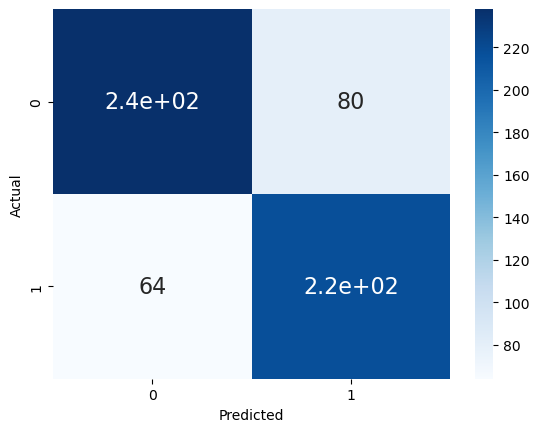

In [94]:
#Plotting the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.2.4 Applying Hyperparameter tuning with Linear Discriminant Analysis (LDA)

In [95]:
# Applying LDA with hyperparameters
test_split_percentages = [0.20]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    lda = LinearDiscriminantAnalysis()
    parameter_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],  
        'shrinkage': [None, 'auto']         
    }
    grid = GridSearchCV(lda, parameter_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 20% Test Split:
LinearDiscriminantAnalysis()
Accuracy for 20% Test Split: 0.7429048414023373




In [96]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7429048414023373
[[229  89]
 [ 65 216]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       318
           1       0.71      0.77      0.74       281

    accuracy                           0.74       599
   macro avg       0.74      0.74      0.74       599
weighted avg       0.75      0.74      0.74       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

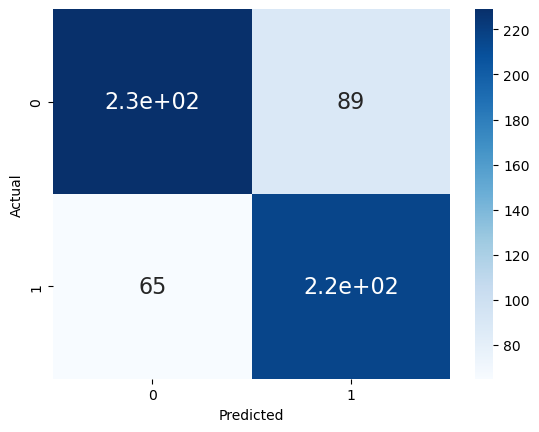

In [97]:
#Plotting the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.2.5 Applying Hyperparameter tuning with KNeighbors Classifier (KNN)

In [98]:
# Applying hyperparameter with KNN model
test_split_percentages = [0.20]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    knn = KNeighborsClassifier()
    parameter_grid = {
        'n_neighbors': [3, 5, 7],  
        'weights': ['uniform', 'distance'], 
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
    }
    grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 20% Test Split:
KNeighborsClassifier(n_neighbors=7)
Accuracy for 20% Test Split: 0.7412353923205343




In [99]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7412353923205343
[[217 101]
 [ 54 227]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       318
           1       0.69      0.81      0.75       281

    accuracy                           0.74       599
   macro avg       0.75      0.75      0.74       599
weighted avg       0.75      0.74      0.74       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

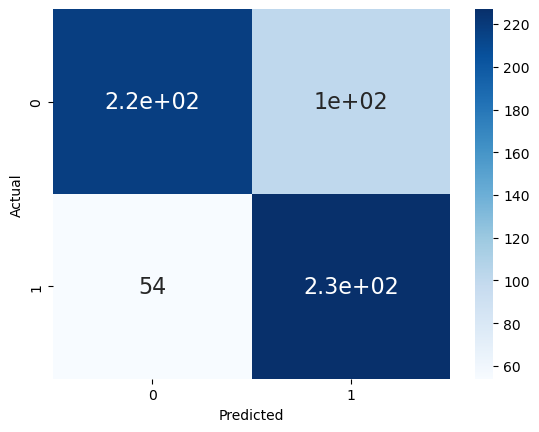

In [100]:
#Printing the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.3 Applying the models with 30% test and 70% training

In [101]:
# Defining the variables and splitting the data 
from sklearn.model_selection import train_test_split
X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(4930, 15) (2113, 15) (4930,) (2113,)


In [102]:
# Counting values inside the target variable
y_train.value_counts()

0    3635
1    1295
Name: Churn, dtype: int64

In [103]:
# Applying models with accuracy as scote metric
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [104]:
# Results of the models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.800813 (0.010778)
LDA: 0.800203 (0.010335)
KNN: 0.760852 (0.008955)
CART: 0.725151 (0.020416)
NB: 0.788439 (0.014730)
NN: 0.791888 (0.009491)
RF: 0.779715 (0.016116)


Accuracy Score:  0.8102224325603408

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.69      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113


Confusion Matrix: 
 [[1392  147]
 [ 254  320]]


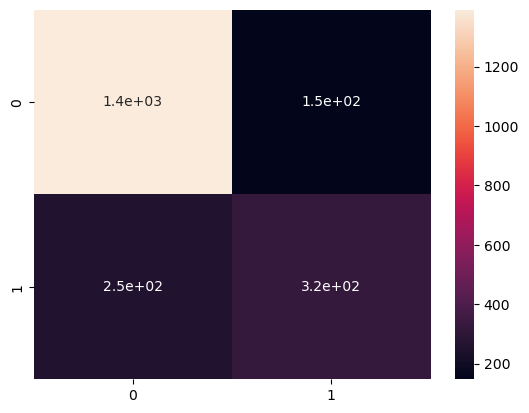

In [105]:
# Clasification Report and confusion matrix of LR model
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)
print("Accuracy Score: ", accuracy_score(y_validation, y_pred))
print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))
cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

### 9.3.1 Model Tuning with 30% test and 70% training

In [106]:
#Applying models with recall as score metric
scoring = 'recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [107]:
#Printing the results of the models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.512283 (0.025499)
LDA: 0.547506 (0.026060)
KNN: 0.495128 (0.026842)
CART: 0.465238 (0.024200)
NB: 0.555909 (0.031752)
NN: 0.490842 (0.043938)
RF: 0.411901 (0.035154)


In [108]:
# Analyzing NB model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [109]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.792238523426408
[[1335  204]
 [ 235  339]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1539
           1       0.62      0.59      0.61       574

    accuracy                           0.79      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

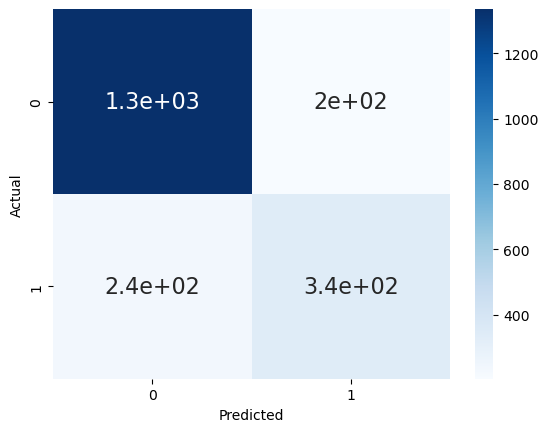

In [110]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.3.2 Model Tuning for balancing the sample using Random Under Sampling with 30% test and 70% training.

In [111]:
#Showing the forst 5 rows of the target variable
y_train.head()

1695    0
1095    0
3889    0
3667    0
2902    0
Name: Churn, dtype: int64

Distribution of the Classes in the subsample churn dataset
1    0.5
0    0.5
Name: Churn, dtype: float64


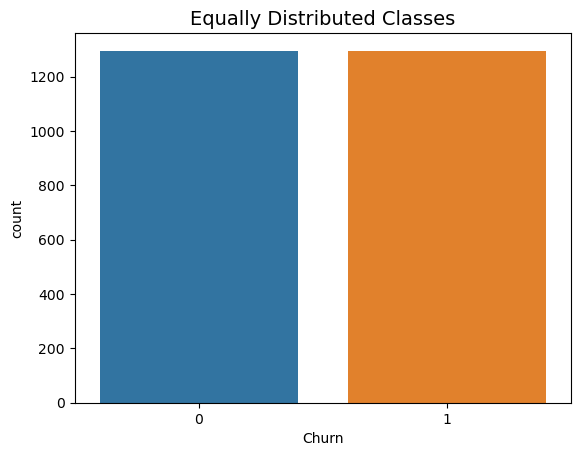

In [112]:
# Balancing the data
df = pd.concat([X_train, y_train], axis=1)
churned_df = df.loc[df['Churn'] == 1]
non_churned_df = df.loc[df['Churn'] == 0][:churned_df.shape[0]]
normal_distributed_df = pd.concat([churned_df, non_churned_df])
df_new_churn = normal_distributed_df.sample(frac=1, random_state=42)
y_train_new= df_new_churn["Churn"]
X_train_new = df_new_churn.loc[:, df_projected.columns != 'Churn']
print('Distribution of the Classes in the subsample churn dataset')
print(df_new_churn['Churn'].value_counts() / len(df_new_churn))
sns.countplot(x='Churn', data=df_new_churn)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

In [113]:
#Applying models with accuracy as score metric
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [114]:
#Showing results of the models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.755985 (0.019421)
LDA: 0.750965 (0.018860)
KNN: 0.727027 (0.012000)
CART: 0.658687 (0.012979)
NB: 0.740927 (0.017481)
NN: 0.737066 (0.022460)
RF: 0.732819 (0.016435)


### 9.3.3 Applying Hyperparameter tuning with Logistic Regression

In [115]:
#Applying hyperparameters with LR model
test_split_percentages = [0.30]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], 
        'solver': ['liblinear'], 
        'penalty': ['l1', 'l2'], 
        'max_iter': [100, 200, 300]  
    }

    logistic_regression = LogisticRegression()
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_predict = best_model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(best_model)
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 30% Test Split:
LogisticRegression(C=10, solver='liblinear')
Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy for 30% Test Split: 0.7734877734877735




In [116]:
# Showing the classification matrix
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7734877734877735
[[305  77]
 [ 99 296]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       382
           1       0.79      0.75      0.77       395

    accuracy                           0.77       777
   macro avg       0.77      0.77      0.77       777
weighted avg       0.77      0.77      0.77       777



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

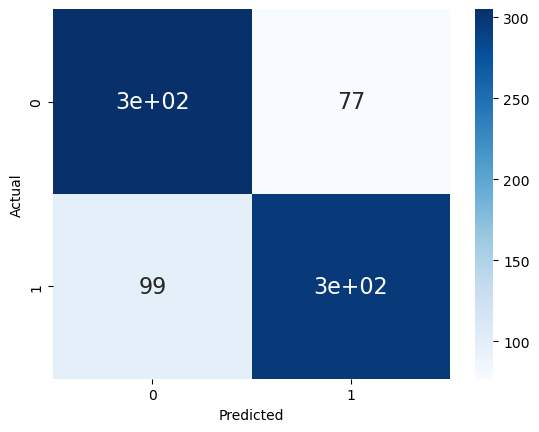

In [117]:
#Showing the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.3.4 Applying Hyperparameter tuning with Linear Discriminant Analysis (LDA)

In [118]:
# Applying hyperparameter tuning with LDA model
test_split_percentages = [0.30]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    lda = LinearDiscriminantAnalysis()
    parameter_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],  
        'shrinkage': [None, 'auto']          
    }
    grid = GridSearchCV(lda, parameter_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 30% Test Split:
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
Accuracy for 30% Test Split: 0.7722007722007722




In [119]:
# Showing the classification matrix
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7722007722007722
[[297  85]
 [ 92 303]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       382
           1       0.78      0.77      0.77       395

    accuracy                           0.77       777
   macro avg       0.77      0.77      0.77       777
weighted avg       0.77      0.77      0.77       777



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

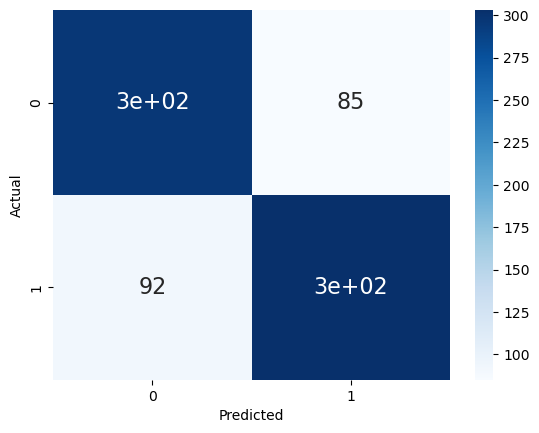

In [120]:
#Showing the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

### 9.3.5 Applying Hyperparameter tuning with KNeighbors Classifier (KNN)

In [121]:
# Applying hyperparameter tuning with KNN model
test_split_percentages = [0.30]
for test_size in test_split_percentages:
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    knn = KNeighborsClassifier()
    parameter_grid = {
        'n_neighbors': [3, 5, 7], 
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }
    grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 30% Test Split:
KNeighborsClassifier(algorithm='brute', n_neighbors=7)
Accuracy for 30% Test Split: 0.7258687258687259




In [122]:
# Showing the classification matrix
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7258687258687259
[[267 115]
 [ 98 297]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       382
           1       0.72      0.75      0.74       395

    accuracy                           0.73       777
   macro avg       0.73      0.73      0.73       777
weighted avg       0.73      0.73      0.73       777



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

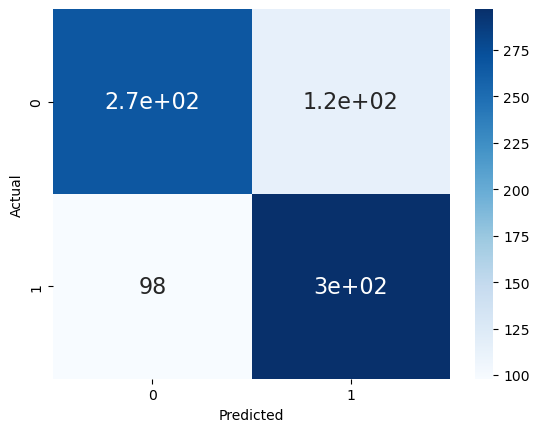

In [123]:
#Showing the confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## 10 Results

First, we are going to see the summary table of results of the capstone project applied last semester.

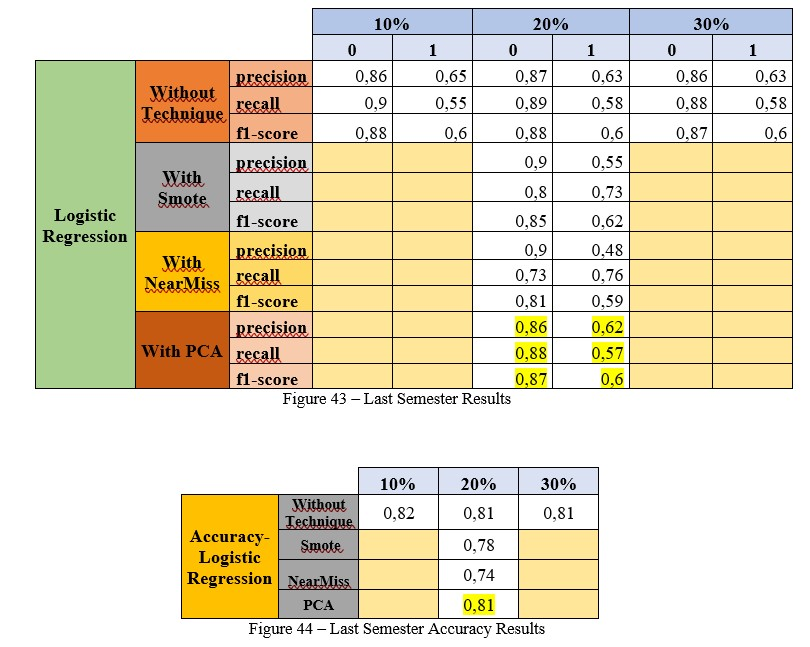

In [124]:
from IPython.display import Image
Image(filename =r'last_semester_results.jpg')

Last semester Emily’s group analysed different models defining Logistic Regression as the best model because of its accuracy and they applied with this model Smote, Nearmiss, and PCA; all of them separated from each other and PCA was the best model with an accuracy of 81% and the values of recall were high 0.86 when they analysed the 0 (customers that didn’t churn), but in the other side we had a recall that was 0.57 for the value of 1 (customers that churned the company). This model was good; however, we decided to make changes to get new results to improve the model with the base that we want to improve the prediction to know the customers that are going to churn in the company

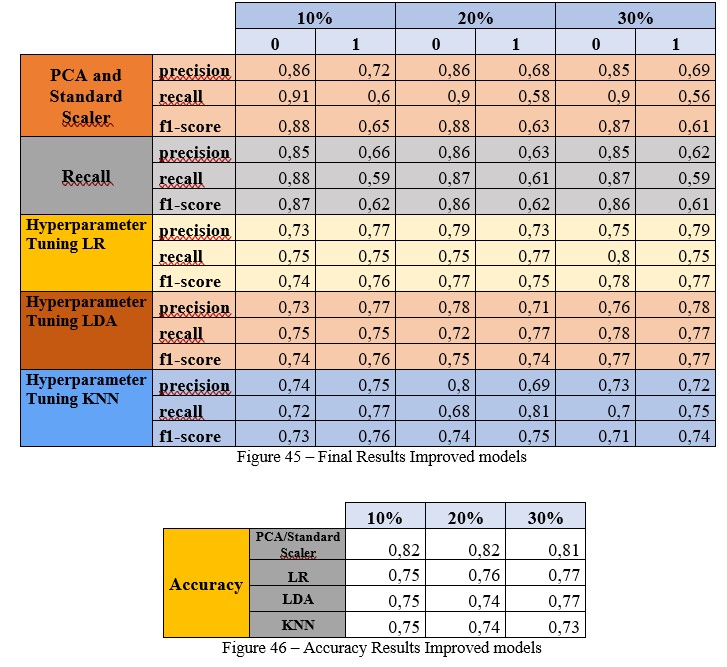

In [125]:
from IPython.display import Image
Image(filename =r'table_of results.jpg')

This is the summary tables of results for the prediction, we decided to apply PCA and standard Scaler, then evaluate the models according to the accuracy and then recall comparing them with the base that we want to improve recall; that is how we decided to balance the data equally implementing distributed Balance Tuning and we decided to analyse Logistic Regression, Linear Discriminant Analysis, and KNeighbors models with 3 different test splits that were 10, 20, 30. In all of them we can see the improvement of recall that was our principal goal since we want a model that predicts exactly what clients are going to churn in the company. The best model of all is Logistic Regression, which has an accuracy of 76%; this accuracy is lower than the previous semester. However, we need to consider that in this case hyperparameters were applied and the data was correctly balance giving results that give us confidence to trust the prediction and recall was improved to 0.81 if we compare with the 20% split that las semester recall had.

## 11 Conclusion

The conclusions are the next:
- The best model applying hyperparameter and balancing the data is Logistic Regression in which we have an accuracy of 76 % in 20% test split and we have a recall of 0.81% improving last semester recall that was 0.57.
- The best 3 models to perform a prediction based in the implementation of hyperparameters are Linear Regression, Linear Discrimination Analysis, and KNeighbors models.
- Last semester Smote and Nearmiss were applied into the models and they introduce bias and variance giving us results in which we can not trust at all, that is why we decided to balance the data before applying hyperparameters.
- Last semester One Hot Encoding was applied to the data which is a good method if we have many rows to analyse, but as our data is limited, we decided to encode the categorical to numerical values with Label Encoding for not having problems with the curse of Dimensionality.
- An indeed exploration was done inside the variables to encode them correctly specially analysing null values where we found that last semester “OnlineBackup” was encoded incorrectly.
- Correlation methods were applied to realize feature engineering with ANOVA and chi-squared test to fundament the dropped variables that were not correlated with the target variable.
- In EDA visualizations we can see that many customers churn after the first month of getting our services and we need to do external studies to know the reason of that since probably other companies get better offers for them when clients are new.
- The company needs to analyse a way to change the monthly contract for longer term contracts since according to the visualization customers that get long term plans stays at our company and they become loyal clients.